In [59]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/home/jw3514/Work/CellType_Psy/src')
from CellType_PSY import *
#import scanpy as sc
HGNC, ENSID2Entrez, GeneSymbol2Entrez, Entrez2Symbol = LoadGeneINFO()
os.chdir("/home/jw3514/Work/CellType_Psy/notebooks3/")
print(f"Current working directory: {os.getcwd()}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current working directory: /home/jw3514/Work/CellType_Psy/notebooks3


In [60]:
mpl.rcParams['font.family'] = 'Arial'

In [61]:
ASD_GW = Fil2Dict("../../UNIMED/dat/Genetics/GeneWeights/Rare/GW.ASD.top60.txt")
ASD_Hiq_GW = Fil2Dict("../dat/GeneWeights/HIQ.top60.nopLI.gw")
ESCZ_GW = Fil2Dict("../../UNIMED/dat/Genetics/GeneWeights/Rare/GW.SCZ.top60.txt")
SCZ_GW = Fil2Dict("../dat3/SCZ_MutCount_61.gw")
#SCZ_GW = Fil2Dict("../dat/GeneWeights/") 

In [62]:
ASD_GW = ASD_Hiq_GW

In [63]:
HCT_Z2_MAT_HCT = pd.read_csv("../dat/HumanCTExpressionMats/Human.CT.Exp.Entrez.log2.Z2.HCT.z1clip3.csv", index_col=0)
max_Z, min_Z = 3, -3
HCT_Z2_MAT_HCT = HCT_Z2_MAT_HCT.clip(upper=max_Z, lower=min_Z)

In [64]:
tmp_ASD_Bias = AvgCTZ_Weighted(HCT_Z2_MAT_HCT, ASD_GW, Method = 1)
tmp_ASD_Bias = AnnotateCTDat(tmp_ASD_Bias, Anno)

tmp_SCZ_Bias = AvgCTZ_Weighted(HCT_Z2_MAT_HCT, SCZ_GW, Method = 1)
tmp_SCZ_Bias = AnnotateCTDat(tmp_SCZ_Bias, Anno)

r,p = GetSingeCellBiasCorr(tmp_ASD_Bias, tmp_SCZ_Bias)
print(r,p)

0.6292393355960272 3.373497087899285e-52


In [65]:
SCZ_Bias = pd.read_csv("../dat/Bias/HCT.SCZ61.Z2.HCT.csv", index_col=0)
HighIQ_ASD_Bias = pd.read_csv("../dat/Bias/HCT.ASD60.HIQ.Z2.HCT.csv", index_col=0)
r,p = GetSingeCellBiasCorr(HighIQ_ASD_Bias, SCZ_Bias)
print(r,p)

0.6063123521767303 1.2936453629462906e-47


In [66]:
gnomad4 = pd.read_csv("/home/jw3514/Work/data/gnomad/gnomad.v4.0.constraint_metrics.tsv", sep="\t")
search_text = 'ENST'
gnomad4 = gnomad4[(gnomad4["transcript"].str.contains(search_text))]
gnomad4 = gnomad4[gnomad4["mane_select"]==True]
for i, row in gnomad4.iterrows():
    symbol = row["gene"]
    gnomad4.loc[i, "Entrez"] = int(GeneSymbol2Entrez.get(symbol, 0))
gnomad4 = gnomad4[gnomad4["Entrez"]!=0]

gnomad4 = gnomad4[["Entrez", "gene", "transcript", "lof_hc_lc.obs", "lof_hc_lc.exp", 
                   "lof.pLI", "lof.z_score", "mis.z_score"]]
gnomad4_lofz_rank = gnomad4.sort_values("lof.z_score", ascending=False)
gnomad4_lofz_rank["Entrez"] = gnomad4_lofz_rank["Entrez"].astype('int')

In [67]:
gnomad4_lofz_rank.head(10)

,Entrez,gene,transcript,lof_hc_lc.obs,lof_hc_lc.exp,lof.pLI,lof.z_score,mis.z_score
192273,7273,TTN,ENST00000589042,1461.0,3182.00,3.047600e-90,25.806,6.9794
99243,23499,MACF1,ENST00000564288,174.0,828.16,1.000000e+00,19.239,6.1868
53778,1778,DYNC1H1,ENST00000360184,53.0,550.39,1.000000e+00,17.989,16.0530
97058,4035,LRP1,ENST00000243077,51.0,543.98,1.000000e+00,17.889,12.0110
52970,667,DST,ENST00000680361,197.0,746.79,1.000000e+00,17.021,3.9149
92013,8085,KMT2D,ENST00000301067,54.0,480.10,1.000000e+00,16.459,4.6964
194154,23352,UBR4,ENST00000375254,123.0,589.75,1.000000e+00,16.260,8.4160
190573,8295,TRRAP,ENST00000456197,38.0,432.70,1.000000e+00,16.060,10.5030
63740,2200,FBN1,ENST00000316623,27.0,353.03,1.000000e+00,14.678,8.1787
195995,9736,USP34,ENST00000398571,46.0,387.08,1.000000e+00,14.673,1.8821


In [68]:
## Idenfity missing genes

In [69]:
gnomad4 = pd.read_csv("/home/jw3514/Work/data/gnomad/gnomad.v4.0.constraint_metrics.tsv", sep="\t")
search_text = 'ENST'
gnomad4 = gnomad4[(gnomad4["transcript"].str.contains(search_text))]
gnomad4 = gnomad4[gnomad4["mane_select"]==True]
for i, row in gnomad4.iterrows():
    symbol = row["gene"]
    gnomad4.loc[i, "Entrez"] = int(GeneSymbol2Entrez.get(symbol, 0))

In [70]:
# Find genes in ASD_GW or SCZ_GW but not in gnomad4_lofz_rank
ASD_missing = set(ASD_GW.keys()) - set(gnomad4_lofz_rank["Entrez"])
SCZ_missing = set(SCZ_GW.keys()) - set(gnomad4_lofz_rank["Entrez"])

print("ASD genes not in gnomad4_lofz_rank:", len(ASD_missing))
print("SCZ genes not in gnomad4_lofz_rank:", len(SCZ_missing))

Missing_Symbols_G4 = []
print("\nMissing ASD genes:")
for gene in ASD_missing:
    print(gene, Entrez2Symbol[gene])
    Missing_Symbols_G4.append(Entrez2Symbol[gene])

print("\nMissing SCZ genes:")
for gene in SCZ_missing:
    print(gene, Entrez2Symbol[gene])
    Missing_Symbols_G4.append(Entrez2Symbol[gene])
# Original filtering
#ASD_GeneLofZ = gnomad4_lofz_rank[gnomad4_lofz_rank["Entrez"].isin(ASD_GW.keys())]
#SCZ_GeneLofZ = gnomad4_lofz_rank[gnomad4_lofz_rank["Entrez"].isin(SCZ_GW.keys())]

ASD genes not in gnomad4_lofz_rank: 1
SCZ genes not in gnomad4_lofz_rank: 5

Missing ASD genes:
4204 MECP2

Missing SCZ genes:
203427 SLC25A43
2892 GRIA3
1968 EIF2S3
81300 OR4P4
9947 MAGEC1


In [71]:
gnomad4 = pd.read_csv("/home/jw3514/Work/data/gnomad/gnomad.v4.0.constraint_metrics.tsv", sep="\t")
search_text = 'ENST'
gnomad4 = gnomad4[(gnomad4["transcript"].str.contains(search_text))]
gnomad4 = gnomad4[gnomad4["mane_select"]==True]
for i, row in gnomad4.iterrows():
    symbol = row["gene"]
    gnomad4.loc[i, "Entrez"] = int(GeneSymbol2Entrez.get(symbol, 0))
gnomad4 = gnomad4[gnomad4["Entrez"]!=0]

gnomad2 = pd.read_csv("/home/jw3514/Work/data/gnomad/gnomad.v2.1.1.lof_metrics.by_gene.txt", sep="\t")
for i, row in gnomad2.iterrows():
    symbol = row["gene"]
    gnomad2.loc[i, "Entrez"] = int(GeneSymbol2Entrez.get(symbol, 0))

In [72]:
gnomad2.head(2)

,gene,transcript,obs_mis,exp_mis,oe_mis,mu_mis,possible_mis,obs_mis_pphen,exp_mis_pphen,oe_mis_pphen,...,gene_length,exac_pLI,exac_obs_lof,exac_exp_lof,exac_oe_lof,brain_expression,chromosome,start_position,end_position,Entrez
0,MED13,ENST00000397786,871,1117.8,0.77921,0.000056,14195,314.0,529.75,0.59273,...,122678,1.0,0.0,64.393,0.000000,NaN,17,60019966,60142643,9969.0
1,NIPBL,ENST00000282516,846,1441.5,0.58688,0.000074,18540,158.0,543.10,0.29092,...,189655,1.0,1.0,110.570,0.009044,NaN,5,36876861,37066515,25836.0


In [73]:
gnomad4.columns.values

array(['gene', 'transcript', 'mane_select', 'lof_hc_lc.obs',
       'lof_hc_lc.exp', 'lof_hc_lc.possible', 'lof_hc_lc.oe',
       'lof_hc_lc.mu', 'lof_hc_lc.pLI', 'lof_hc_lc.pNull',
       'lof_hc_lc.pRec', 'lof.obs', 'lof.exp', 'lof.possible', 'lof.oe',
       'lof.mu', 'lof.pLI', 'lof.pNull', 'lof.pRec', 'lof.oe_ci.lower',
       'lof.oe_ci.upper', 'lof.z_raw', 'lof.z_score', 'mis.obs',
       'mis.exp', 'mis.possible', 'mis.oe', 'mis.mu', 'mis.oe_ci.lower',
       'mis.oe_ci.upper', 'mis.z_raw', 'mis.z_score', 'mis_pphen.obs',
       'mis_pphen.exp', 'mis_pphen.possible', 'mis_pphen.oe', 'syn.obs',
       'syn.exp', 'syn.possible', 'syn.oe', 'syn.mu', 'syn.oe_ci.lower',
       'syn.oe_ci.upper', 'syn.z_raw', 'syn.z_score', 'constraint_flags',
       'Entrez'], dtype=object)

<Axes: >

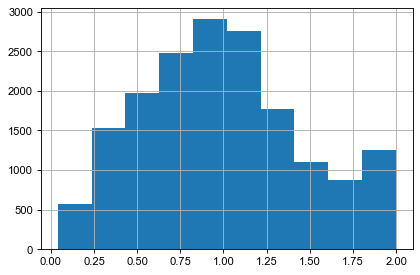

In [74]:
gnomad4["lof.oe_ci.upper"].hist()

In [75]:
gnomad2.columns.values

array(['gene', 'transcript', 'obs_mis', 'exp_mis', 'oe_mis', 'mu_mis',
       'possible_mis', 'obs_mis_pphen', 'exp_mis_pphen', 'oe_mis_pphen',
       'possible_mis_pphen', 'obs_syn', 'exp_syn', 'oe_syn', 'mu_syn',
       'possible_syn', 'obs_lof', 'mu_lof', 'possible_lof', 'exp_lof',
       'pLI', 'pNull', 'pRec', 'oe_lof', 'oe_syn_lower', 'oe_syn_upper',
       'oe_mis_lower', 'oe_mis_upper', 'oe_lof_lower', 'oe_lof_upper',
       'constraint_flag', 'syn_z', 'mis_z', 'lof_z', 'oe_lof_upper_rank',
       'oe_lof_upper_bin', 'oe_lof_upper_bin_6', 'n_sites', 'classic_caf',
       'max_af', 'no_lofs', 'obs_het_lof', 'obs_hom_lof', 'defined', 'p',
       'exp_hom_lof', 'classic_caf_afr', 'classic_caf_amr',
       'classic_caf_asj', 'classic_caf_eas', 'classic_caf_fin',
       'classic_caf_nfe', 'classic_caf_oth', 'classic_caf_sas', 'p_afr',
       'p_amr', 'p_asj', 'p_eas', 'p_fin', 'p_nfe', 'p_oth', 'p_sas',
       'transcript_type', 'gene_id', 'transcript_level', 'cds_length',
       'n

<Axes: >

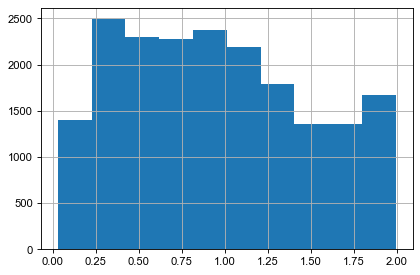

In [76]:
gnomad2["oe_lof_upper"].hist()

In [77]:
# Find genes in ASD_GW or SCZ_GW but not in gnomad4_lofz_rank
ASD_missing = set(ASD_GW.keys()) - set(gnomad2["Entrez"])
SCZ_missing = set(SCZ_GW.keys()) - set(gnomad2["Entrez"])

print("ASD genes not in gnomad4_lofz_rank:", len(ASD_missing))
print("SCZ genes not in gnomad4_lofz_rank:", len(SCZ_missing))

Missing_Symbols_G2 = []
print("\nMissing ASD genes:")
for gene in ASD_missing:
    print(gene, Entrez2Symbol[gene])
    Missing_Symbols_G2.append(Entrez2Symbol[gene])

print("\nMissing SCZ genes:")
for gene in SCZ_missing:
    print(gene, Entrez2Symbol[gene])
    Missing_Symbols_G2.append(Entrez2Symbol[gene])
# Original filtering
#ASD_GeneLofZ = gnomad4_lofz_rank[gnomad4_lofz_rank["Entrez"].isin(ASD_GW.keys())]
#SCZ_GeneLofZ = gnomad4_lofz_rank[gnomad4_lofz_rank["Entrez"].isin(SCZ_GW.keys())]


ASD genes not in gnomad4_lofz_rank: 1
SCZ genes not in gnomad4_lofz_rank: 3

Missing ASD genes:
51111 KMT5B

Missing SCZ genes:
3008 H1-4
399909 PCNX3
55719 SLF2


In [78]:
gnomad2.columns.values

array(['gene', 'transcript', 'obs_mis', 'exp_mis', 'oe_mis', 'mu_mis',
       'possible_mis', 'obs_mis_pphen', 'exp_mis_pphen', 'oe_mis_pphen',
       'possible_mis_pphen', 'obs_syn', 'exp_syn', 'oe_syn', 'mu_syn',
       'possible_syn', 'obs_lof', 'mu_lof', 'possible_lof', 'exp_lof',
       'pLI', 'pNull', 'pRec', 'oe_lof', 'oe_syn_lower', 'oe_syn_upper',
       'oe_mis_lower', 'oe_mis_upper', 'oe_lof_lower', 'oe_lof_upper',
       'constraint_flag', 'syn_z', 'mis_z', 'lof_z', 'oe_lof_upper_rank',
       'oe_lof_upper_bin', 'oe_lof_upper_bin_6', 'n_sites', 'classic_caf',
       'max_af', 'no_lofs', 'obs_het_lof', 'obs_hom_lof', 'defined', 'p',
       'exp_hom_lof', 'classic_caf_afr', 'classic_caf_amr',
       'classic_caf_asj', 'classic_caf_eas', 'classic_caf_fin',
       'classic_caf_nfe', 'classic_caf_oth', 'classic_caf_sas', 'p_afr',
       'p_amr', 'p_asj', 'p_eas', 'p_fin', 'p_nfe', 'p_oth', 'p_sas',
       'transcript_type', 'gene_id', 'transcript_level', 'cds_length',
       'n

In [79]:
gnomad4.columns.values

array(['gene', 'transcript', 'mane_select', 'lof_hc_lc.obs',
       'lof_hc_lc.exp', 'lof_hc_lc.possible', 'lof_hc_lc.oe',
       'lof_hc_lc.mu', 'lof_hc_lc.pLI', 'lof_hc_lc.pNull',
       'lof_hc_lc.pRec', 'lof.obs', 'lof.exp', 'lof.possible', 'lof.oe',
       'lof.mu', 'lof.pLI', 'lof.pNull', 'lof.pRec', 'lof.oe_ci.lower',
       'lof.oe_ci.upper', 'lof.z_raw', 'lof.z_score', 'mis.obs',
       'mis.exp', 'mis.possible', 'mis.oe', 'mis.mu', 'mis.oe_ci.lower',
       'mis.oe_ci.upper', 'mis.z_raw', 'mis.z_score', 'mis_pphen.obs',
       'mis_pphen.exp', 'mis_pphen.possible', 'mis_pphen.oe', 'syn.obs',
       'syn.exp', 'syn.possible', 'syn.oe', 'syn.mu', 'syn.oe_ci.lower',
       'syn.oe_ci.upper', 'syn.z_raw', 'syn.z_score', 'constraint_flags',
       'Entrez'], dtype=object)

In [80]:
columns_to_keep_g2 = ["Entrez", "gene", "pLI", "lof_z"]
columns_to_keep_g4 = ["Entrez", "gene", "lof.pLI", "lof.z_score"]
gnomad2 = gnomad2[columns_to_keep_g2]
gnomad4 = gnomad4[columns_to_keep_g4]
gnomad2.columns = columns_to_keep_g4
# append gene in Missing_Symbols_G4 from gnomad2

# If gene 



In [81]:
gnomad2.head(2)

,Entrez,gene,lof.pLI,lof.z_score
0,9969.0,MED13,1.0,9.1935
1,25836.0,NIPBL,1.0,11.2860


In [82]:
ASD_missing = set(ASD_GW.keys()) - set(gnomad4["Entrez"])
SCZ_missing = set(SCZ_GW.keys()) - set(gnomad4["Entrez"])

print("ASD genes not in gnomad4_lofz_rank:", len(ASD_missing))
print("SCZ genes not in gnomad4_lofz_rank:", len(SCZ_missing))

Missing_Symbols_G4 = []
print("\nMissing ASD genes:")
for gene in ASD_missing:
    print(gene, Entrez2Symbol[gene])
    Missing_Symbols_G4.append(Entrez2Symbol[gene])

print("\nMissing SCZ genes:")
for gene in SCZ_missing:
    print(gene, Entrez2Symbol[gene])
    Missing_Symbols_G4.append(Entrez2Symbol[gene])

ASD genes not in gnomad4_lofz_rank: 1
SCZ genes not in gnomad4_lofz_rank: 5

Missing ASD genes:
4204 MECP2

Missing SCZ genes:
203427 SLC25A43
2892 GRIA3
1968 EIF2S3
81300 OR4P4
9947 MAGEC1


In [83]:
for gene in Missing_Symbols_G4:
    if gene in gnomad2["gene"].values:
        row = gnomad2[gnomad2["gene"]==gene]
        gnomad4 = gnomad4.append(row, ignore_index=True)

/tmp/ipykernel_514276/1600708724.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gnomad4 = gnomad4.append(row, ignore_index=True)


In [84]:
ASD_missing = set(ASD_GW.keys()) - set(gnomad4["Entrez"])
SCZ_missing = set(SCZ_GW.keys()) - set(gnomad4["Entrez"])

print("ASD genes not in gnomad4_lofz_rank:", len(ASD_missing))
print("SCZ genes not in gnomad4_lofz_rank:", len(SCZ_missing))

print("\nMissing ASD genes:")
for gene in ASD_missing:
    print(gene)

print("\nMissing SCZ genes:")
for gene in SCZ_missing:
    print(gene)

ASD genes not in gnomad4_lofz_rank: 0
SCZ genes not in gnomad4_lofz_rank: 0

Missing ASD genes:

Missing SCZ genes:


In [85]:
gnomad4_lofz_rank = gnomad4.sort_values("lof.z_score", ascending=False)
gnomad4_lofz_rank["Entrez"] = gnomad4_lofz_rank["Entrez"].astype('int')

In [86]:
BrainSpan = pd.read_csv("/home/jw3514/Work/CellType_Psy/dat2/ExpMatch/BrainSpan.MatchDF.csv", index_col=0)
HumanSC = pd.read_csv("/home/jw3514/Work/CellType_Psy/dat2/ExpMatch/HumanCT.MatchDF.csv", index_col=0)

In [87]:
ASD_GeneLofZ = gnomad4_lofz_rank[gnomad4_lofz_rank["Entrez"].isin(ASD_GW.keys())]
SCZ_GeneLofZ = gnomad4_lofz_rank[gnomad4_lofz_rank["Entrez"].isin(SCZ_GW.keys())]

In [88]:
# Annotate GW n Partition according to pLI
for i, row in ASD_GeneLofZ.iterrows():
    Entrez = row["Entrez"]
    ASD_GeneLofZ.loc[i, "GW"] = ASD_GW[Entrez]
    try:
        ASD_GeneLofZ.loc[i, "BrainSpan"] = BrainSpan.loc[Entrez, "WB"]
        ASD_GeneLofZ.loc[i, "HumanCTExp"] = HumanSC.loc[Entrez, "Exp"]
    except:
        ASD_GeneLofZ.loc[i, "BrainSpan"] = -1
        ASD_GeneLofZ.loc[i, "HumanCTExp"] = 0
for i, row in SCZ_GeneLofZ.iterrows():
    Entrez = row["Entrez"]
    SCZ_GeneLofZ.loc[i, "GW"] = SCZ_GW[Entrez]
    try:
        SCZ_GeneLofZ.loc[i, "BrainSpan"] = BrainSpan.loc[Entrez, "WB"]
        SCZ_GeneLofZ.loc[i, "HumanCTExp"] = HumanSC.loc[Entrez, "Exp"]
    except:
        SCZ_GeneLofZ.loc[i, "BrainSpan"] = -1
        SCZ_GeneLofZ.loc[i, "HumanCTExp"] = 0

/tmp/ipykernel_514276/638084132.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASD_GeneLofZ.loc[i, "GW"] = ASD_GW[Entrez]
/tmp/ipykernel_514276/638084132.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASD_GeneLofZ.loc[i, "BrainSpan"] = BrainSpan.loc[Entrez, "WB"]
/tmp/ipykernel_514276/638084132.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [89]:
ASD_GeneLofZ.head(2)

,Entrez,gene,lof.pLI,lof.z_score,GW,BrainSpan,HumanCTExp
4291,1778,DYNC1H1,1.0,17.989,0.268,5.590113,9.636294e+06
7630,4297,KMT2A,1.0,14.445,0.138,2.087176,1.272627e+07


In [90]:
SCZ_GeneLofZ.head(2)

,Entrez,gene,lof.pLI,lof.z_score,GW,BrainSpan,HumanCTExp
10693,27445,PCLO,1.0,13.621,3.904408,2.773615,4.203083e+07
6423,8925,HERC1,1.0,13.039,5.207460,3.243137,2.602141e+07


In [91]:
ASD_GeneHumanExp = ASD_GeneLofZ.sort_values("HumanCTExp", ascending=False)
SCZ_GeneHumanExp = SCZ_GeneLofZ.sort_values("HumanCTExp", ascending=False)

In [92]:
ASD_GeneHumanExp.head(2)

,Entrez,gene,lof.pLI,lof.z_score,GW,BrainSpan,HumanCTExp
638,287,ANK2,1.0,12.4240,0.69,5.008495,8.799958e+07
6101,2904,GRIN2B,1.0,8.1812,0.13,1.722094,5.068329e+07


#### Gradually remove Genes ranked by pLI/LOFZ/LUOF score vs random genes, how correlation change?

In [93]:
ASD_GeneLofZ.to_csv("ASD_GeneLofZ.csv", index=False)
SCZ_GeneLofZ.to_csv("SCZ_GeneLofZ.csv", index=False)

In [94]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [95]:
X, Y = [],[]
for i in range(0, 31, 1):
#for i in range(1, 3, 1):
    #print(i)
    tmp_ASD_GW = dict(zip(ASD_GeneLofZ["Entrez"].values[i:], ASD_GeneLofZ["GW"].values[i:]))
    tmp_SCZ_GW = dict(zip(SCZ_GeneLofZ["Entrez"].values[i:], SCZ_GeneLofZ["GW"].values[i:]))
    
    tmp_ASD_Bias = AvgCTZ_Weighted(HCT_Z2_MAT_HCT, tmp_ASD_GW, Method = 1)
    tmp_ASD_Bias = AnnotateCTDat(tmp_ASD_Bias, Anno)

    tmp_SCZ_Bias = AvgCTZ_Weighted(HCT_Z2_MAT_HCT, tmp_SCZ_GW, Method = 1)
    tmp_SCZ_Bias = AnnotateCTDat(tmp_SCZ_Bias, Anno)
    
    r,p = GetSingeCellBiasCorr(tmp_ASD_Bias, tmp_SCZ_Bias)
    
    #print(i, r)
    X.append(i)
    Y.append(r)

In [96]:
Y_rev = []
for i in range(0, 31, 1):
#for i in range(1, 3, 1):
    #print(i)
    tmp_ASD_GW = dict(zip(ASD_GeneLofZ["Entrez"].values[::-1][i:], ASD_GeneLofZ["GW"].values[::-1][i:]))
    tmp_SCZ_GW = dict(zip(SCZ_GeneLofZ["Entrez"].values[::-1][i:], SCZ_GeneLofZ["GW"].values[::-1][i:]))
    
    tmp_ASD_Bias = AvgCTZ_Weighted(HCT_Z2_MAT_HCT, tmp_ASD_GW, Method = 1)
    tmp_ASD_Bias = AnnotateCTDat(tmp_ASD_Bias, Anno)

    tmp_SCZ_Bias = AvgCTZ_Weighted(HCT_Z2_MAT_HCT, tmp_SCZ_GW, Method = 1)
    tmp_SCZ_Bias = AnnotateCTDat(tmp_SCZ_Bias, Anno)
    
    r,p = GetSingeCellBiasCorr(tmp_ASD_Bias, tmp_SCZ_Bias)

    Y_rev.append(r)

In [97]:
i=0
idx = 1
#DF1 = ASD_GeneLofZ.sample(frac=1, random_state=idx)
#DF2 = SCZ_GeneLofZ.sample(frac=1, random_state=idx)
DF1 = ASD_GeneLofZ
DF2 = SCZ_GeneLofZ
tmp_ASD_GW = dict(zip(DF1["Entrez"].values[i:], DF1["GW"].values[i:]))
tmp_SCZ_GW = dict(zip(DF2["Entrez"].values[i:], DF2["GW"].values[i:]))

tmp_ASD_Bias = AvgCTZ_Weighted(HCT_Z2_MAT_HCT, tmp_ASD_GW, Method = 1)
tmp_ASD_Bias = AnnotateCTDat(tmp_ASD_Bias, Anno)

tmp_SCZ_Bias = AvgCTZ_Weighted(HCT_Z2_MAT_HCT, tmp_SCZ_GW, Method = 1)
tmp_SCZ_Bias = AnnotateCTDat(tmp_SCZ_Bias, Anno)

r,p = GetSingeCellBiasCorr(tmp_ASD_Bias, tmp_SCZ_Bias)
print(r,p)

0.6292393355960272 3.373497087899285e-52


In [98]:
with open('../scripts/ASD_SCZ_HumanCT_BiasCorrRandomGeneRemove.npy', 'rb') as f:
    RandYY = np.load(f)

In [99]:
RandYY

array([[0.62923934, 0.60966744, 0.61688753, ..., 0.21099138, 0.18194238,
        0.14658777],
       [0.62923934, 0.62968016, 0.63465449, ..., 0.63289745, 0.61918239,
        0.58928532],
       [0.62923934, 0.68185946, 0.71977338, ..., 0.65302922, 0.62753252,
        0.70864041],
       ...,
       [0.62923934, 0.64738257, 0.66189892, ..., 0.64673169, 0.68063498,
        0.67625237],
       [0.62923934, 0.63973759, 0.6527257 , ..., 0.15197782, 0.18527812,
        0.19067649],
       [0.62923934, 0.60976825, 0.59576792, ..., 0.63529925, 0.62538353,
        0.57372258]])

In [100]:
rand_mean = RandYY.mean(axis=0)
rand_std = RandYY.std(axis=0)

In [101]:
rand_std

array([1.33226763e-15, 2.36023084e-02, 3.38754458e-02, 4.17147623e-02,
       4.89114232e-02, 5.39951146e-02, 6.10209339e-02, 6.71291052e-02,
       7.40047749e-02, 7.85803311e-02, 8.25127278e-02, 8.79566648e-02,
       9.30051601e-02, 9.92613109e-02, 1.05404758e-01, 1.09877427e-01,
       1.14529232e-01, 1.20800566e-01, 1.27114350e-01, 1.33691406e-01,
       1.38643205e-01, 1.43047788e-01, 1.47151192e-01, 1.53533044e-01,
       1.57715724e-01, 1.62214322e-01, 1.66975467e-01, 1.75237466e-01,
       1.85071715e-01, 1.94258706e-01, 1.99693039e-01])

In [102]:
from matplotlib import rcParams, font_manager
font_path = '/usr/share/fonts/truetype/msttcorefonts/Arial.ttf'  # Replace with the actual path
rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()

In [103]:
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/msttcorefonts/Arial.ttf'
fm.fontManager.addfont(font_path)  # Only if you're adding a new font file
fm._load_fontmanager(try_read_cache=False)

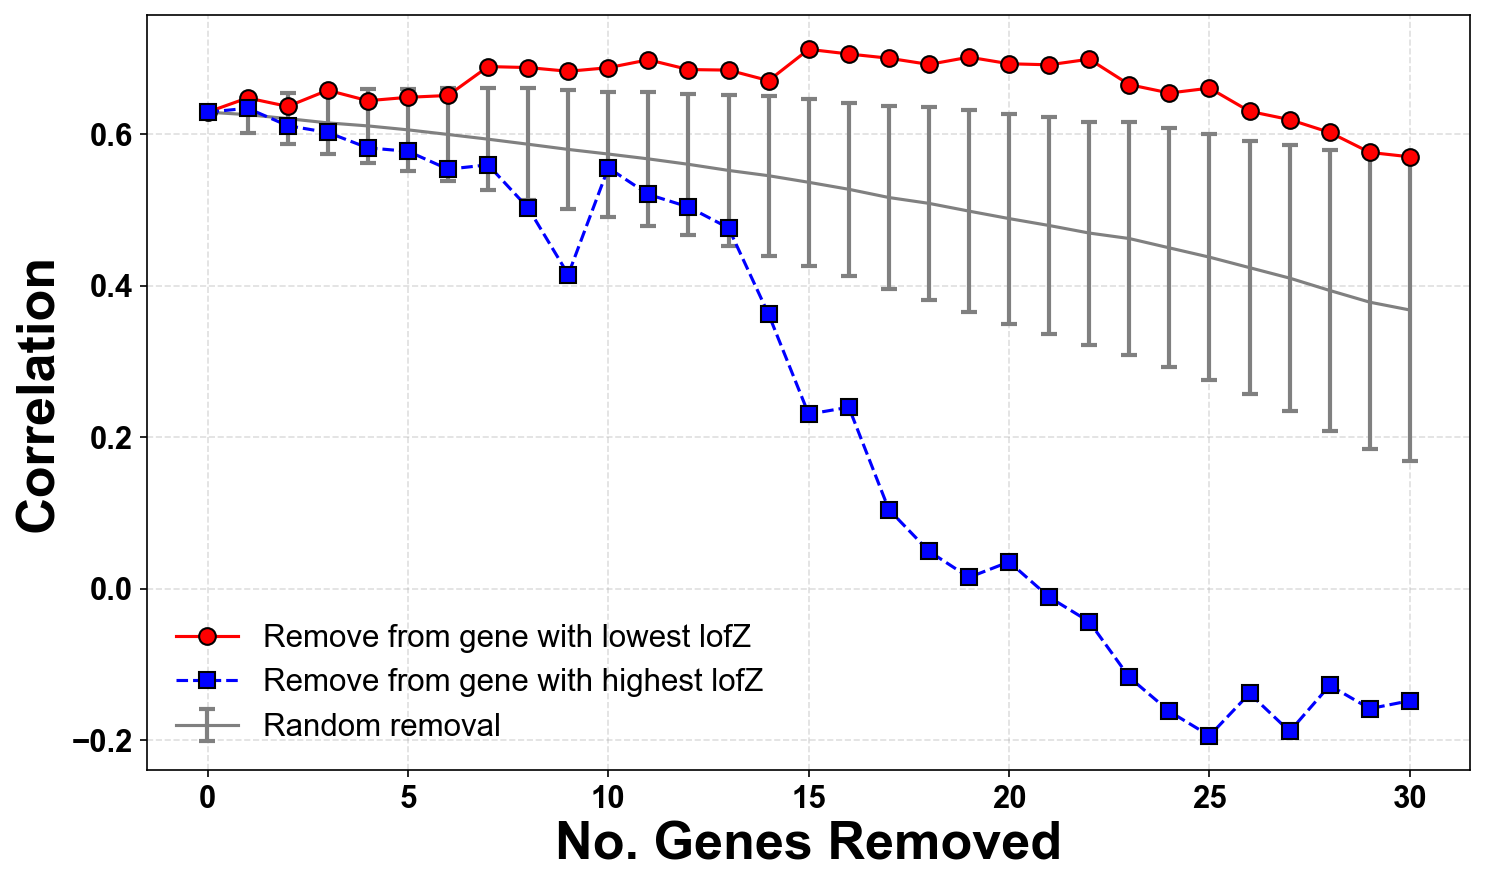

In [104]:
import matplotlib.pyplot as plt

plt.figure(dpi=150, figsize=(10, 6))

# Plotting the main lines with custom markers and edge colors
plt.plot(X, Y_rev, label="Remove from gene with lowest lofZ", color="red", linestyle='-', marker='o', markersize=8, markeredgecolor='black', markeredgewidth=1, zorder=10)
plt.plot(X, Y, label="Remove from gene with highest lofZ", color="blue", linestyle='--', marker='s', markersize=8, markeredgecolor='black', markeredgewidth=1, zorder=10)

# Plotting the error bars for the random removal with custom error bar style
plt.errorbar(X, rand_mean, yerr=rand_std, fmt='-', color="grey", ecolor='grey', elinewidth=2, capsize=4, capthick=2, label="Random removal", zorder=5)

# Adding labels, title, and legend with improved font properties
plt.xlabel("No. Genes Removed", fontsize=25, fontweight='bold')
plt.ylabel("Correlation", fontsize=25, fontweight='bold')
#plt.title("Correlation vs No. Genes Removed", fontsize=16, fontweight='bold')
plt.legend(fontsize=15, loc='best', frameon=False)

# Adding grid lines with subtle customization
plt.grid(True, linestyle='--', alpha=0.4)

# Adjusting tick parameters for better readability
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')

# Optimizing layout for better spacing and alignment
plt.tight_layout()

# Showing the plot
plt.show()


In [105]:
RandYY.shape

(1000, 31)

In [106]:
RandYY[:, 30].shape

(1000,)

In [107]:
GetPermutationP(RandYY[:, 30], Y[30], gt=False)

(-2.5830133813564067, 0.012987012987012991)

In [108]:
GetPermutationP(RandYY[:, 30], Y_rev[30], gt=True)

(1.0125543701648925, 0.15784215784215783)

In [109]:
idx = 20
print(GetPermutationP(RandYY[:, idx], Y[idx], gt=False))
print(GetPermutationP(RandYY[:, idx], Y_rev[idx], gt=True))

(-3.2683069014318993, 0.004995004995005048)
(1.474150201743852, 0.04595404595404595)


In [110]:
GetPermutationP(RandYY[:, 20], Y_rev[20], gt=True)

(1.474150201743852, 0.04595404595404595)

#### Gradually remove Genes ranked by Expression Level vs random genes, how correlation change?

In [111]:
X, Y = [],[]
for i in range(0, 31, 1):
#for i in range(1, 3, 1):
    #print(i)
    tmp_ASD_GW = dict(zip(ASD_GeneHumanExp["Entrez"].values[i:], ASD_GeneHumanExp["GW"].values[i:]))
    tmp_SCZ_GW = dict(zip(SCZ_GeneHumanExp["Entrez"].values[i:], SCZ_GeneHumanExp["GW"].values[i:]))
    
    tmp_ASD_Bias = AvgCTZ_Weighted(HCT_Z2_MAT_HCT, tmp_ASD_GW, Method = 1)
    tmp_ASD_Bias = AnnotateCTDat(tmp_ASD_Bias, Anno)

    tmp_SCZ_Bias = AvgCTZ_Weighted(HCT_Z2_MAT_HCT, tmp_SCZ_GW, Method = 1)
    tmp_SCZ_Bias = AnnotateCTDat(tmp_SCZ_Bias, Anno)
    
    r,p = GetSingeCellBiasCorr(tmp_ASD_Bias, tmp_SCZ_Bias)
    
    #print(i, r)
    X.append(i)
    Y.append(r)

In [112]:
Y_rev = []
for i in range(0, 31, 1):
#for i in range(1, 3, 1):
    #print(i)
    tmp_ASD_GW = dict(zip(ASD_GeneHumanExp["Entrez"].values[::-1][i:], ASD_GeneHumanExp["GW"].values[::-1][i:]))
    tmp_SCZ_GW = dict(zip(SCZ_GeneHumanExp["Entrez"].values[::-1][i:], SCZ_GeneHumanExp["GW"].values[::-1][i:]))
    
    tmp_ASD_Bias = AvgCTZ_Weighted(HCT_Z2_MAT_HCT, tmp_ASD_GW, Method = 1)
    tmp_ASD_Bias = AnnotateCTDat(tmp_ASD_Bias, Anno)

    tmp_SCZ_Bias = AvgCTZ_Weighted(HCT_Z2_MAT_HCT, tmp_SCZ_GW, Method = 1)
    tmp_SCZ_Bias = AnnotateCTDat(tmp_SCZ_Bias, Anno)
    
    r,p = GetSingeCellBiasCorr(tmp_ASD_Bias, tmp_SCZ_Bias)

    Y_rev.append(r)

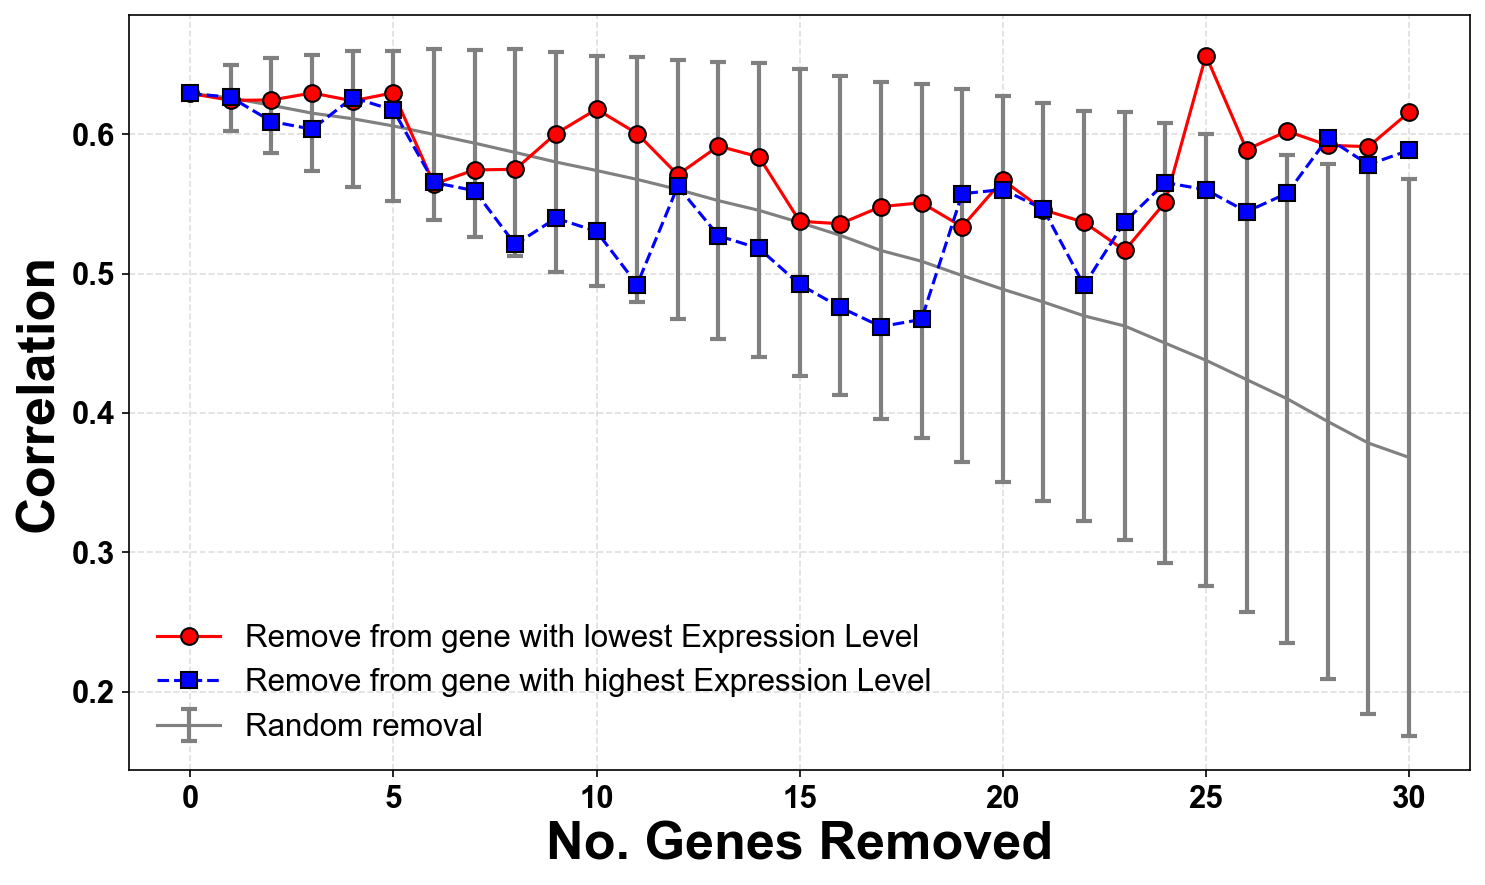

In [113]:
import matplotlib.pyplot as plt

plt.figure(dpi=150, figsize=(10, 6))

# Plotting the main lines with custom markers and edge colors
plt.plot(X, Y_rev, label="Remove from gene with lowest Expression Level", color="red", linestyle='-', marker='o', markersize=8, markeredgecolor='black', markeredgewidth=1, zorder=10)
plt.plot(X, Y, label="Remove from gene with highest Expression Level", color="blue", linestyle='--', marker='s', markersize=8, markeredgecolor='black', markeredgewidth=1, zorder=10)

# Plotting the error bars for the random removal with custom error bar style
plt.errorbar(X, rand_mean, yerr=rand_std, fmt='-', color="grey", ecolor='grey', elinewidth=2, capsize=4, capthick=2, label="Random removal", zorder=5)

# Adding labels, title, and legend with improved font properties
plt.xlabel("No. Genes Removed", fontsize=25, fontweight='bold')
plt.ylabel("Correlation", fontsize=25, fontweight='bold')
#plt.title("Correlation vs No. Genes Removed", fontsize=16, fontweight='bold')
plt.legend(fontsize=15, loc='best', frameon=False)

# Adding grid lines with subtle customization
plt.grid(True, linestyle='--', alpha=0.4)

# Adjusting tick parameters for better readability
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')

# Optimizing layout for better spacing and alignment
plt.tight_layout()

# Showing the plot
plt.show()


In [114]:
# Try Brain span
ASD_GeneBSExp = ASD_GeneLofZ.sort_values("BrainSpan", ascending=False)
SCZ_GeneBSExp = SCZ_GeneLofZ.sort_values("BrainSpan", ascending=False)

In [115]:
X, Y = [],[]
for i in range(0, 31, 1):
#for i in range(1, 3, 1):
    #print(i)
    tmp_ASD_GW = dict(zip(ASD_GeneBSExp["Entrez"].values[i:], ASD_GeneBSExp["GW"].values[i:]))
    tmp_SCZ_GW = dict(zip(SCZ_GeneBSExp["Entrez"].values[i:], SCZ_GeneBSExp["GW"].values[i:]))
    
    tmp_ASD_Bias = AvgCTZ_Weighted(HCT_Z2_MAT_HCT, tmp_ASD_GW, Method = 1)
    tmp_ASD_Bias = AnnotateCTDat(tmp_ASD_Bias, Anno)

    tmp_SCZ_Bias = AvgCTZ_Weighted(HCT_Z2_MAT_HCT, tmp_SCZ_GW, Method = 1)
    tmp_SCZ_Bias = AnnotateCTDat(tmp_SCZ_Bias, Anno)
    
    r,p = GetSingeCellBiasCorr(tmp_ASD_Bias, tmp_SCZ_Bias)
    
    #print(i, r)
    X.append(i)
    Y.append(r)

In [116]:
Y_rev = []
for i in range(0, 31, 1):
#for i in range(1, 3, 1):
    #print(i)
    tmp_ASD_GW = dict(zip(ASD_GeneBSExp["Entrez"].values[::-1][i:], ASD_GeneBSExp["GW"].values[::-1][i:]))
    tmp_SCZ_GW = dict(zip(SCZ_GeneBSExp["Entrez"].values[::-1][i:], SCZ_GeneBSExp["GW"].values[::-1][i:]))
    
    tmp_ASD_Bias = AvgCTZ_Weighted(HCT_Z2_MAT_HCT, tmp_ASD_GW, Method = 1)
    tmp_ASD_Bias = AnnotateCTDat(tmp_ASD_Bias, Anno)

    tmp_SCZ_Bias = AvgCTZ_Weighted(HCT_Z2_MAT_HCT, tmp_SCZ_GW, Method = 1)
    tmp_SCZ_Bias = AnnotateCTDat(tmp_SCZ_Bias, Anno)
    
    r,p = GetSingeCellBiasCorr(tmp_ASD_Bias, tmp_SCZ_Bias)

    Y_rev.append(r)

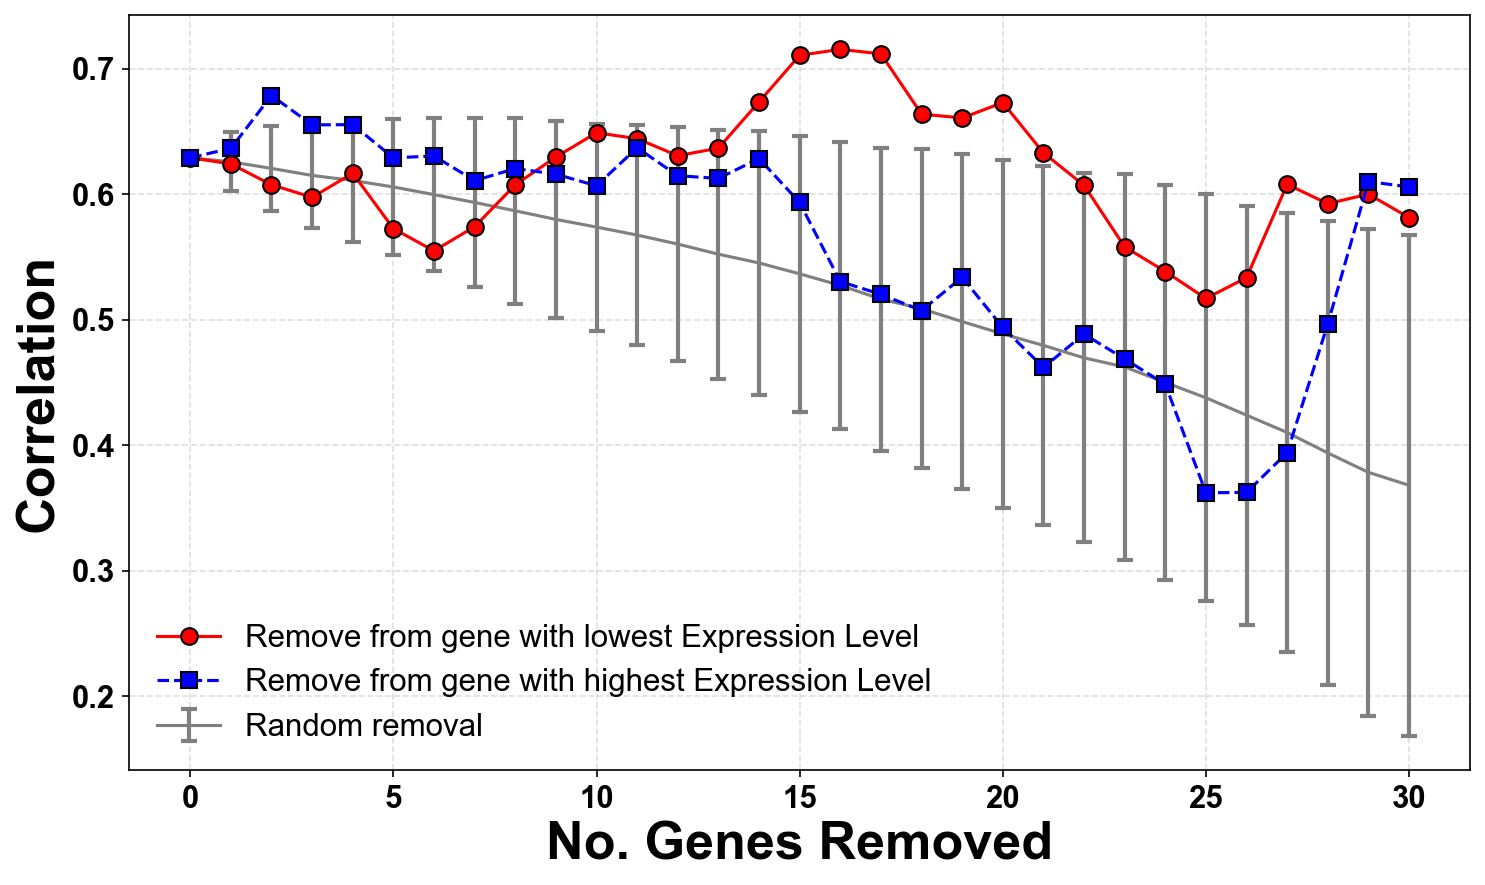

In [117]:
import matplotlib.pyplot as plt

plt.figure(dpi=150, figsize=(10, 6))

# Plotting the main lines with custom markers and edge colors
plt.plot(X, Y_rev, label="Remove from gene with lowest Expression Level", color="red", linestyle='-', marker='o', markersize=8, markeredgecolor='black', markeredgewidth=1, zorder=10)
plt.plot(X, Y, label="Remove from gene with highest Expression Level", color="blue", linestyle='--', marker='s', markersize=8, markeredgecolor='black', markeredgewidth=1, zorder=10)

# Plotting the error bars for the random removal with custom error bar style
plt.errorbar(X, rand_mean, yerr=rand_std, fmt='-', color="grey", ecolor='grey', elinewidth=2, capsize=4, capthick=2, label="Random removal", zorder=5)

# Adding labels, title, and legend with improved font properties
plt.xlabel("No. Genes Removed", fontsize=25, fontweight='bold')
plt.ylabel("Correlation", fontsize=25, fontweight='bold')
#plt.title("Correlation vs No. Genes Removed", fontsize=16, fontweight='bold')
plt.legend(fontsize=15, loc='best', frameon=False)

# Adding grid lines with subtle customization
plt.grid(True, linestyle='--', alpha=0.4)

# Adjusting tick parameters for better readability
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')

# Optimizing layout for better spacing and alignment
plt.tight_layout()

# Showing the plot
plt.show()


# Mouse STR


In [139]:
MouseSTR_Z2 = pd.read_csv("../../ASD_Circuits/dat/allen-mouse-exp/AllenMouseBrain_Z2bias.csv", index_col=0)
MouseSTR_Z2.head(2)

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
1,0.409837,-0.581435,-0.594606,-0.800554,-0.782203,1.696205,-0.905862,NaN,-0.385306,-0.505779,...,-0.941669,1.135876,-1.144142,-0.212505,1.221017,-0.112535,0.223401,-0.177226,1.284936,0.738990
2,-0.439982,-0.589145,-0.496139,-0.521484,0.106047,-0.407245,-0.018364,-0.398513,-0.208207,-0.480868,...,-0.499681,-0.523493,-0.152573,-0.275961,-0.373536,-0.539785,-0.543094,-0.382633,0.036790,1.109502


In [147]:
ASD_GW_FULL = Fil2Dict("/home/jw3514/Work/ASD_Circuits/dat/Unionize_bias/Spark_Meta_EWS.GeneWeight.csv")
ASD_GW_nopLI = Fil2Dict("/home/jw3514/Work/ASD_Circuits/dat/Unionize_bias/Spark_Meta_EWS.GeneWeight.NopLI.csv")

In [153]:
#ASD_MouseSTR_Bias = AvgCTZ_Weighted(MouseSTR_Z2, ASD_GW_FULL, Method = 1)
ASD_MouseSTR_Bias = AvgSTRZ_Weighted(MouseSTR_Z2, ASD_GW_nopLI, Method = 1)
SCZ_MouseSTR_Bias = AvgSTRZ_Weighted(MouseSTR_Z2, SCZ_GW, Method = 1)
MouseSTR_Corr, MouseSTR_P = GetSingeCellBiasCorr(ASD_MouseSTR_Bias, SCZ_MouseSTR_Bias)
MouseSTR_Corr


0.7781733603880379

In [154]:
ASD_MouseSTR_Bias

,EFFECT,REGION,Rank
STR,,,
Nucleus_accumbens,0.541293,Striatum,1
Orbital_area_lateral_part,0.519283,Isocortex,2
Prelimbic_area,0.516410,Isocortex,3
Orbital_area_ventrolateral_part,0.489000,Isocortex,4
Primary_somatosensory_area_lower_limb,0.479504,Isocortex,5
...,...,...,...
Superior_olivary_complex,-0.637932,Pons,209
Paragigantocellular_reticular_nucleus_lateral_part,-0.641511,Medulla,210
Pontine_reticular_nucleus_caudal_part,-0.641629,Pons,211


In [167]:
X_STR, Y_STR = [],[]
for i in range(0, 31, 1):
#for i in range(1, 3, 1):
    #print(i)
    tmp_ASD_GW = dict(zip(ASD_GeneLofZ["Entrez"].values[i:], ASD_GeneLofZ["GW"].values[i:]))
    tmp_SCZ_GW = dict(zip(SCZ_GeneLofZ["Entrez"].values[i:], SCZ_GeneLofZ["GW"].values[i:]))
    
    tmp_ASD_Bias = AvgSTRZ_Weighted(MouseSTR_Z2, tmp_ASD_GW, Method = 1)
    tmp_SCZ_Bias = AvgSTRZ_Weighted(MouseSTR_Z2, tmp_SCZ_GW, Method = 1)
    
    r,p = GetSingeCellBiasCorr(tmp_ASD_Bias, tmp_SCZ_Bias)

    X_STR.append(i)
    Y_STR.append(r)


In [168]:
Y_STR_rev = []
for i in range(0, 31, 1):
#for i in range(1, 3, 1):
    #print(i)
    tmp_ASD_GW = dict(zip(ASD_GeneLofZ["Entrez"].values[::-1][i:], ASD_GeneLofZ["GW"].values[::-1][i:]))
    tmp_SCZ_GW = dict(zip(SCZ_GeneLofZ["Entrez"].values[::-1][i:], SCZ_GeneLofZ["GW"].values[::-1][i:]))
    
    tmp_ASD_Bias = AvgSTRZ_Weighted(MouseSTR_Z2, tmp_ASD_GW, Method = 1)
    tmp_SCZ_Bias = AvgSTRZ_Weighted(MouseSTR_Z2, tmp_SCZ_GW, Method = 1)
    r,p = GetSingeCellBiasCorr(tmp_ASD_Bias, tmp_SCZ_Bias)

    Y_STR_rev.append(r)

In [170]:
with open('../scripts/ASD_SCZ_BiasCorrRandomGeneRemove.npy', 'rb') as f:
    RandYY = np.load(f)
rand_mean = RandYY.mean(axis=0)
rand_std = RandYY.std(axis=0)


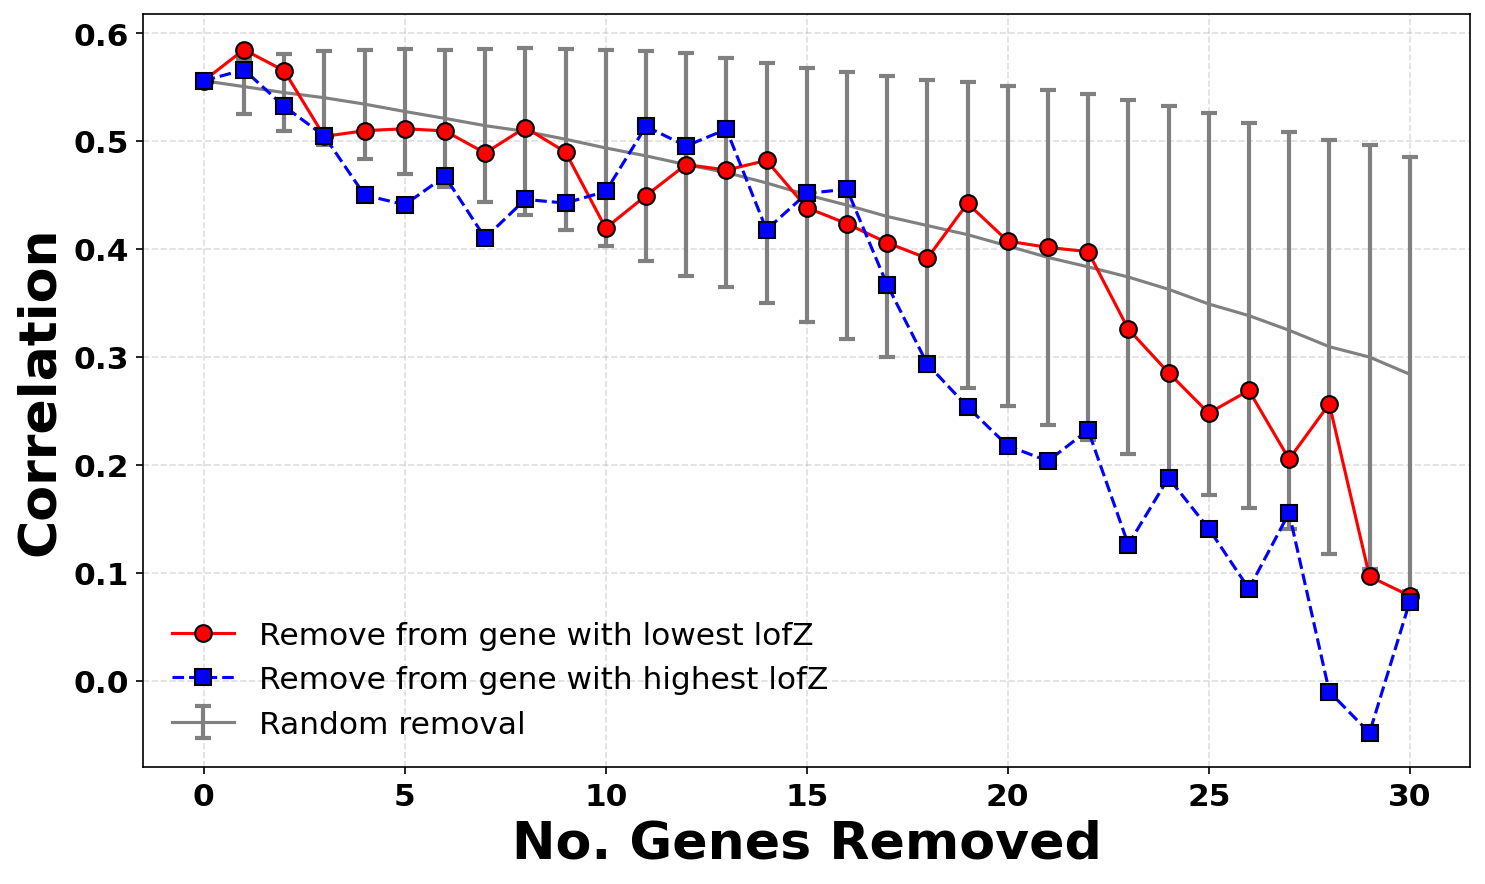

In [171]:
import matplotlib.pyplot as plt

plt.figure(dpi=150, figsize=(10, 6))

# Plotting the main lines with custom markers and edge colors
plt.plot(X_STR, Y_STR_rev, label="Remove from gene with lowest lofZ", color="red", linestyle='-', marker='o', markersize=8, markeredgecolor='black', markeredgewidth=1, zorder=10)
plt.plot(X_STR, Y_STR, label="Remove from gene with highest lofZ", color="blue", linestyle='--', marker='s', markersize=8, markeredgecolor='black', markeredgewidth=1, zorder=10)

# Plotting the error bars for the random removal with custom error bar style
plt.errorbar(X, rand_mean, yerr=rand_std, fmt='-', color="grey", ecolor='grey', elinewidth=2, capsize=4, capthick=2, label="Random removal", zorder=5)

# Adding labels, title, and legend with improved font properties
plt.xlabel("No. Genes Removed", fontsize=25, fontweight='bold')
plt.ylabel("Correlation", fontsize=25, fontweight='bold')
#plt.title("Correlation vs No. Genes Removed", fontsize=16, fontweight='bold')
plt.legend(fontsize=15, loc='best', frameon=False)

# Adding grid lines with subtle customization
plt.grid(True, linestyle='--', alpha=0.4)

# Adjusting tick parameters for better readability
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')

# Optimizing layout for better spacing and alignment
plt.tight_layout()

# Showing the plot
plt.show()
